In [1]:
import pandas as pd
import numpy as np


%matplotlib inline

In [2]:
df = pd.read_csv('DistroKid_1692024584968.csv')

#cdbaby last few years
dfcd_1 = pd.read_excel('2021DigitalDistributionDetails.xlsx')
dfcd_2 = pd.read_excel('2022DigitalDistributionDetails.xlsx')
dfcd_3 = pd.read_excel('2023DigitalDistributionDetails.xlsx')

#all cd baby sales (I got this later on so that's why I started with past 3 years above)

#this is not working because it thinks it is a list
dfcd = pd.read_excel('all_cd_baby_digital_081623.xlsx')

In [3]:
df.columns = [column.replace(" ", "_") for column in df.columns]
dfcd_1.columns = [column.replace(" ", "_") for column in dfcd_1.columns]
dfcd_2.columns = [column.replace(" ", "_") for column in dfcd_2.columns]
dfcd_3.columns = [column.replace(" ", "_") for column in dfcd_3.columns]
dfcd.columns = [column.replace(" ", "_") for column in dfcd.columns]


In [4]:
df = df.rename(columns = {'Earnings_(USD)': 'Earnings'})
dfcd_1 = dfcd_1.rename(columns = {"Sales_Date": "Sale_Month", "Report_Date": "Reporting_date", "Delivery_Country": "Country_of_Sale", "Artist_Name": "Artist", "Track_Name":"Title", "Subtotal": "Earnings", "Partner_Name":"Store"})
dfcd_2 = dfcd_2.rename(columns = {"Sales_Date": "Sale_Month", "Report_Date": "Reporting_date", "Delivery_Country": "Country_of_Sale", "Artist_Name": "Artist", "Track_Name":"Title", "Subtotal": "Earnings", "Partner_Name":"Store"})
dfcd_3 = dfcd_3.rename(columns = {"Sales_Date": "Sale_Month", "Report_Date": "Reporting_date", "Delivery_Country": "Country_of_Sale", "Artist_Name": "Artist", "Track_Name":"Title", "Subtotal": "Earnings", "Partner_Name":"Store"})
dfcd = dfcd.rename(columns = {"Sales_Date": "Sale_Month", "Report_Date": "Reporting_date", "Delivery_Country": "Country_of_Sale", "Artist_Name": "Artist", "Track_Name":"Title", "Subtotal": "Earnings", "Partner_Name":"Store"})


In [5]:
df.columns

Index(['Reporting_Date', 'Sale_Month', 'Store', 'Artist', 'Title', 'ISRC',
       'UPC', 'Quantity', 'Team_Percentage', 'Song/Album', 'Country_of_Sale',
       'Songwriter_Royalties_Withheld', 'Earnings'],
      dtype='object')

In [6]:
df_all = pd.concat([df,dfcd])
df_all

,Reporting_Date,Sale_Month,Store,Artist,Title,ISRC,UPC,Quantity,Team_Percentage,Song/Album,Country_of_Sale,Songwriter_Royalties_Withheld,Earnings,Reporting_date,Price,Isrc,Barcode,CDBabySku,Album_Name,Transaction_Type
0,2023-02-02,2022-11,Apple Music,Ignite Mindz,Silver Surfer,QZNWV2214291,1.971467e+11,1,100.0,Song,CA,0.0,0.007028,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-02-02,2022-11,Apple Music,Ignite Mindz,Brazillionaire,QZNWV2214294,1.971467e+11,1,100.0,Song,JP,0.0,0.002828,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-02-02,2022-11,Apple Music,Ignite Mindz,Good Listener,QZNWV2214289,1.971467e+11,1,100.0,Song,CA,0.0,0.007028,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-28,2021-06,Spotify,Ignite Mindz,Red Lights Flashing (Instrumental),QZK6Q2139811,1.962534e+11,1,100.0,Song,US,0.0,0.003730,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-08-31,2021-06,Apple Music,Ignite Mindz,Red Lights Flashing (Instrumental),QZK6Q2139811,1.962534e+11,1,100.0,Song,US,0.0,0.004275,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40023,NaN,2023-05-31 00:00:00,Amazon US Premium Service,Ignite & Imagery,Lose My Mind (feat. Donnie Vash),NaN,NaN,1,NaN,NaN,US,NaN,0.011667,2023-08-13,0.011667,ushm21076291,8.016552e+11,IgniteandImagery,Gimmick Free,Stream
40024,NaN,2023-05-31 00:00:00,Amazon US Premium Service,Ignite Mindz,Castlevania II,NaN,NaN,1,NaN,NaN,US,NaN,0.006521,2023-08-13,0.006521,usdy41702565,8.882956e+11,ignitemindz2,Influence,Stream
40025,NaN,2023-05-31 00:00:00,Amazon US Premium Service,Ignite Mindz,Chicas,NaN,NaN,1,NaN,NaN,US,NaN,0.006521,2023-08-13,0.006521,uscgh0790036,8.016552e+11,ignitemindz,Psychological Warfare,Stream
40026,NaN,2023-05-31 00:00:00,Amazon US AD supported,Ignite Mindz,Opinion,NaN,NaN,1,NaN,NaN,US,NaN,0.001729,2023-08-14,0.001729,usdy41702573,8.882956e+11,ignitemindz2,Influence,Stream


In [20]:
substring = "Red Lights"
df_all[df_all.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]

,Reporting_Date,Sale_Month,Store,Artist,Title,ISRC,UPC,Quantity,Team_Percentage,Song/Album,Country_of_Sale,Songwriter_Royalties_Withheld,Earnings,Reporting_date,Price,Isrc,Barcode,CDBabySku,Album_Name,Transaction_Type
3,2021-08-28,2021-06,Spotify,Ignite Mindz,Red Lights Flashing (Instrumental),QZK6Q2139811,1.962534e+11,1,100.0,Song,US,0.0,0.003730,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-08-31,2021-06,Apple Music,Ignite Mindz,Red Lights Flashing (Instrumental),QZK6Q2139811,1.962534e+11,1,100.0,Song,US,0.0,0.004275,NaT,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-09-24,2021-07,Apple Music,Ignite Mindz,Red Lights Flashing (Instrumental),QZK6Q2139811,1.962534e+11,3,100.0,Song,US,0.0,0.014163,NaT,NaN,NaN,NaN,NaN,NaN,NaN
10,2021-09-27,2021-07,Amazon Unlimited (Streaming),Ignite Mindz,Red Lights Flashing (Instrumental),QZK6Q2139811,1.962534e+11,1,100.0,Song,US,0.0,0.013870,NaT,NaN,NaN,NaN,NaN,NaN,NaN
11,2021-09-27,2021-07,Amazon Prime (Streaming),Ignite Mindz,Red Lights Flashing (Instrumental),QZK6Q2139811,1.962534e+11,1,100.0,Song,IN,0.0,0.001399,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39997,NaN,2023-05-31 00:00:00,Spotify,Ignite Mindz,Red Lights Flashing,NaN,NaN,1,NaN,NaN,AU,NaN,0.001836,2023-08-06,0.001836,usl4r2064534,1.954487e+11,7valb02214578,Red Lights Flashing,Stream
39998,NaN,2023-05-31 00:00:00,Spotify,Ignite Mindz,Red Lights Flashing,NaN,NaN,1,NaN,NaN,CA,NaN,0.003386,2023-08-06,0.003386,usl4r2064534,1.954487e+11,7valb02214578,Red Lights Flashing,Stream
39999,NaN,2023-05-31 00:00:00,Spotify,Ignite Mindz,Red Lights Flashing,NaN,NaN,2,NaN,NaN,CA,NaN,0.005365,2023-08-06,0.002682,usl4r2064534,1.954487e+11,7valb02214578,Red Lights Flashing,Stream
40000,NaN,2023-05-31 00:00:00,Spotify,Ignite Mindz,Red Lights Flashing,NaN,NaN,1,NaN,NaN,CA,NaN,0.001452,2023-08-06,0.001452,usl4r2064534,1.954487e+11,7valb02214578,Red Lights Flashing,Stream


In [60]:
df_mon = df_all.groupby(['Title','Earnings'])
df_mon = df_mon.first()

In [61]:
df_mon.to_excel('streamsbysong.xlsx')

<AxesSubplot:xlabel='Sale_Month'>

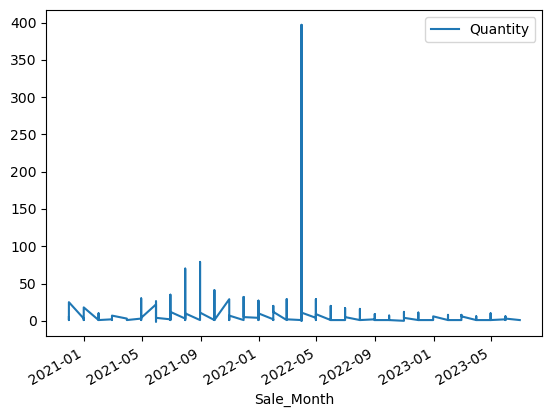

In [37]:
df_red = df_all.query('Title == "Red Lights Flashing"')
df_red.plot("Sale_Month", "Quantity")

In [38]:
df_red["Earnings"].sum()

12.305981586032999

In [167]:
df_like = df.query('Title == "Like (Instrumental)" and Quantity > 20')

In [168]:
df_like["Quantity"].max()

225662

In [169]:
df_like["Earnings"].mean()

0.011564631818181818

In [170]:
df_all["Quantity"].max()

225662

In [171]:
#song_count = df_all["Title"].value_counts()


chicas_dough = df_all.loc[df_all['Title'] == 'Chicas', 'Earnings'].sum()
chica_count = df_all.loc[df_all['Title'] == 'Chicas', 'Quantity'].sum()
print("Chicas has made $",chicas_dough, "from this many streams or instances:", chica_count)

smooth_dolla = df_all.loc[df_all['Title'] == 'Smooth', 'Earnings'].sum()
smooth_count = df_all.loc[df_all['Title'] == 'Smooth', 'Quantity'].sum()
print("Smooth has made $",smooth_dolla, "from this many streams or instances:", smooth_count)


Chicas has made $ 574.091490141178 from this many streams or instances: 120810
Smooth has made $ 20.622261230865 from this many streams or instances: 6647


In [172]:
df_all["Artist"].value_counts()

Ignite Mindz        37257
Ignite & Imagery     4006
Kayla Marie            31
Name: Artist, dtype: int64

TypeError: pie() takes 1 positional argument but 3 were given

In [174]:
IandI = df_all.query('Artist == "Ignite & Imagery"')
IandI

,Reporting_Date,Sale_Month,Store,Artist,Title,ISRC,UPC,Quantity,Team_Percentage,Song/Album,Country_of_Sale,Songwriter_Royalties_Withheld,Earnings,Reporting_date,Price,Isrc,Barcode,CDBabySku,Album_Name,Transaction_Type
352,NaN,2010-08-15 00:00:00,Apple iTunes,Ignite & Imagery,Unknown,NaN,NaN,1,NaN,NaN,US,NaN,6.370000,2010-09-21,6.370000,Unknown,8.016552e+11,IgniteandImagery,Gimmick Free,Download
371,NaN,2010-09-15 00:00:00,Apple iTunes,Ignite & Imagery,Russian Roulette II: Dance With the Devil,NaN,NaN,1,NaN,NaN,US,NaN,0.637000,2010-10-20,0.637000,ushm21076298,8.016552e+11,IgniteandImagery,Gimmick Free,Download
372,NaN,2010-09-15 00:00:00,Apple iTunes,Ignite & Imagery,Unknown,NaN,NaN,1,NaN,NaN,US,NaN,6.370000,2010-10-20,6.370000,Unknown,8.016552e+11,IgniteandImagery,Gimmick Free,Download
373,NaN,2010-09-15 00:00:00,Apple iTunes,Ignite & Imagery,Rise Above (feat. King Mez),NaN,NaN,1,NaN,NaN,US,NaN,0.637000,2010-10-21,0.637000,ushm21076303,8.016552e+11,IgniteandImagery,Gimmick Free,Download
375,NaN,2010-08-15 00:00:00,Amazon Music,Ignite & Imagery,Unknown,NaN,NaN,1,NaN,NaN,US,NaN,5.915000,2010-10-22,5.915000,Unknown,8.016552e+11,IgniteandImagery,Gimmick Free,Download
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39846,NaN,2023-05-31 00:00:00,Spotify,Ignite & Imagery,Introduction,NaN,NaN,1,NaN,NaN,US,NaN,0.004528,2023-08-06,0.004528,ushm21076288,8.016552e+11,IgniteandImagery,Gimmick Free,Stream
39847,NaN,2023-05-31 00:00:00,Spotify,Ignite & Imagery,Redrum Redrum,NaN,NaN,1,NaN,NaN,US,NaN,0.002191,2023-08-06,0.002191,ushm21076300,8.016552e+11,IgniteandImagery,Gimmick Free,Stream
39848,NaN,2023-05-31 00:00:00,Spotify,Ignite & Imagery,Shoot The Deputy (feat. Rudolph Lyrics),NaN,NaN,1,NaN,NaN,RO,NaN,0.002342,2023-08-06,0.002342,ushm21076293,8.016552e+11,IgniteandImagery,Gimmick Free,Stream
39855,NaN,2023-05-31 00:00:00,Spotify,Ignite & Imagery,Shoot The Deputy (feat. Rudolph Lyrics),NaN,NaN,1,NaN,NaN,FI,NaN,0.005057,2023-08-06,0.005057,ushm21076293,8.016552e+11,IgniteandImagery,Gimmick Free,Stream


In [175]:
ign_actual_sales = df_all.query('Artist == "Ignite Mindz" and Earnings > .4')
#ign_actual_sales.to_excel("Ignite_Real_Sales.xlsx")
ign_limited_actual_sales = ign_actual_sales[["Artist","Title","Earnings","Quantity"]]
ign_limited_actual_sales

,Artist,Title,Earnings,Quantity
243,Ignite Mindz,Chill (Instrumental),0.700031,1
286,Ignite Mindz,Chill (Instrumental),0.552828,1
295,Ignite Mindz,Red Lights Flashing (Instrumental),0.726403,1
978,Ignite Mindz,Voodoo (feat. Wordsworth),0.658215,177
0,Ignite Mindz,NaN,6.370000,1
...,...,...,...,...
38298,Ignite Mindz,Chicas,0.415987,51
38827,Ignite Mindz,Chicas,1.857055,240
38841,Ignite Mindz,Chicas,0.455655,110
38859,Ignite Mindz,Chicas,0.481260,1


In [176]:
IandI["Earnings"].sum()

146.825866625563

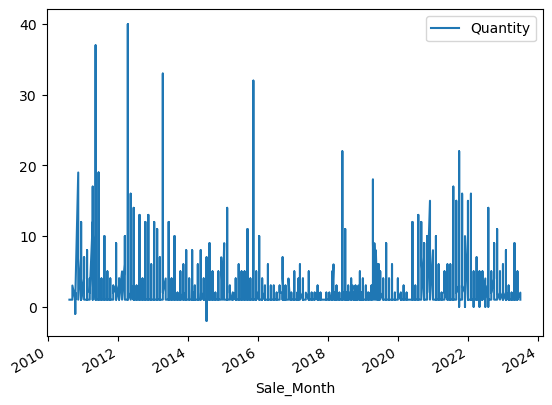

In [177]:
IandI_charts = IandI.plot.line("Sale_Month", "Quantity")

In [178]:
IandI_actual_sales = IandI.query("Earnings > .5")
IandI_actual_sales

,Reporting_Date,Sale_Month,Store,Artist,Title,ISRC,UPC,Quantity,Team_Percentage,Song/Album,Country_of_Sale,Songwriter_Royalties_Withheld,Earnings,Reporting_date,Price,Isrc,Barcode,CDBabySku,Album_Name,Transaction_Type
352,NaN,2010-08-15 00:00:00,Apple iTunes,Ignite & Imagery,Unknown,NaN,NaN,1,NaN,NaN,US,NaN,6.370000,2010-09-21,6.370000,Unknown,8.016552e+11,IgniteandImagery,Gimmick Free,Download
371,NaN,2010-09-15 00:00:00,Apple iTunes,Ignite & Imagery,Russian Roulette II: Dance With the Devil,NaN,NaN,1,NaN,NaN,US,NaN,0.637000,2010-10-20,0.637000,ushm21076298,8.016552e+11,IgniteandImagery,Gimmick Free,Download
372,NaN,2010-09-15 00:00:00,Apple iTunes,Ignite & Imagery,Unknown,NaN,NaN,1,NaN,NaN,US,NaN,6.370000,2010-10-20,6.370000,Unknown,8.016552e+11,IgniteandImagery,Gimmick Free,Download
373,NaN,2010-09-15 00:00:00,Apple iTunes,Ignite & Imagery,Rise Above (feat. King Mez),NaN,NaN,1,NaN,NaN,US,NaN,0.637000,2010-10-21,0.637000,ushm21076303,8.016552e+11,IgniteandImagery,Gimmick Free,Download
375,NaN,2010-08-15 00:00:00,Amazon Music,Ignite & Imagery,Unknown,NaN,NaN,1,NaN,NaN,US,NaN,5.915000,2010-10-22,5.915000,Unknown,8.016552e+11,IgniteandImagery,Gimmick Free,Download
401,NaN,2010-08-15 00:00:00,Groove,Ignite & Imagery,i&I (Get Your Hands High),NaN,NaN,1,NaN,NaN,US,NaN,0.637000,2010-11-22,0.637000,ushm21076289,8.016552e+11,IgniteandImagery,Gimmick Free,Download
402,NaN,2010-10-15 00:00:00,Apple iTunes,Ignite & Imagery,Voodoo (feat. Wordsworth of Lyricist Lounge),NaN,NaN,1,NaN,NaN,US,NaN,0.637000,2010-11-23,0.637000,ushm21076294,8.016552e+11,IgniteandImagery,Gimmick Free,Download
404,NaN,2010-10-15 00:00:00,Apple iTunes,Ignite & Imagery,Rise Above (feat. King Mez),NaN,NaN,2,NaN,NaN,US,NaN,1.274000,2010-11-23,0.637000,ushm21076303,8.016552e+11,IgniteandImagery,Gimmick Free,Download
405,NaN,2010-10-15 00:00:00,Apple iTunes,Ignite & Imagery,Unknown,NaN,NaN,1,NaN,NaN,US,NaN,6.370000,2010-11-23,6.370000,Unknown,8.016552e+11,IgniteandImagery,Gimmick Free,Download
406,NaN,2010-10-15 00:00:00,iTunes-Europe,Ignite & Imagery,Unknown,NaN,NaN,1,NaN,NaN,GB,NaN,6.684121,2010-11-24,6.684121,Unknown,8.016552e+11,IgniteandImagery,Gimmick Free,Download


In [179]:
df_cents = df_all.query('Earnings > .1')

In [180]:
df_all["Store"].mode()

0    Spotify
Name: Store, dtype: object

In [181]:
df_all["Earnings"].sum()

1058.439902850952

In [182]:
countries = df_all["Country_of_Sale"].value_counts()
countries

US    10938
FR     3490
GB     2206
DE     2078
CA     1783
      ...  
SS        1
GW        1
BF        1
PM        1
VU        1
Name: Country_of_Sale, Length: 212, dtype: int64

In [183]:
print(countries[6])

1407


In [184]:
countries.get("AU")

976

In [185]:
dfs = [df, dfcd_1, dfcd_2, dfcd_3]

In [186]:
#uses the functools to put the above list into one big merge/join. BUT NOT NEEDED HERE AS NO CENTRAL DATA BETWEEN THEM
#taking way too long on country of sale
#df_21up_matcher = ft.reduce(lambda left, right: pd.merge(left, right, on='Country_of_Sale'), dfs)

In [187]:
df_21up = pd.concat(dfs, axis=0)

In [188]:
df_21up

,Reporting_Date,Sale_Month,Store,Artist,Title,ISRC,UPC,Quantity,Team_Percentage,Song/Album,Country_of_Sale,Songwriter_Royalties_Withheld,Earnings,Reporting_date,Price,Isrc,Barcode,CDBabySku,Album_Name,Transaction_Type
0,2023-02-02,2022-11,Apple Music,Ignite Mindz,Silver Surfer,QZNWV2214291,1.971467e+11,1,100.0,Song,CA,0.0,0.007028,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-02-02,2022-11,Apple Music,Ignite Mindz,Brazillionaire,QZNWV2214294,1.971467e+11,1,100.0,Song,JP,0.0,0.002828,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-02-02,2022-11,Apple Music,Ignite Mindz,Good Listener,QZNWV2214289,1.971467e+11,1,100.0,Song,CA,0.0,0.007028,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-28,2021-06,Spotify,Ignite Mindz,Red Lights Flashing (Instrumental),QZK6Q2139811,1.962534e+11,1,100.0,Song,US,0.0,0.003730,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-08-31,2021-06,Apple Music,Ignite Mindz,Red Lights Flashing (Instrumental),QZK6Q2139811,1.962534e+11,1,100.0,Song,US,0.0,0.004275,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,NaN,2023-05-31 00:00:00,Amazon US Premium Service,Ignite Mindz,Chicas,NaN,NaN,9,NaN,NaN,US,NaN,0.105006,2023-08-13,0.011667,uscgh0790036,8.016552e+11,ignitemindz,Psychological Warfare,Stream
4679,NaN,2023-05-31 00:00:00,Amazon US Premium Service,Ignite Mindz,Russian Roulette: The Red Mafiya,NaN,NaN,1,NaN,NaN,US,NaN,0.011034,2023-08-13,0.011034,uscgh0790029,8.016552e+11,ignitemindz,Psychological Warfare,Stream
4680,NaN,2023-05-31 00:00:00,Amazon US Premium Service,Ignite & Imagery,Lose My Mind (feat. Donnie Vash),NaN,NaN,1,NaN,NaN,US,NaN,0.011667,2023-08-13,0.011667,ushm21076291,8.016552e+11,IgniteandImagery,Gimmick Free,Stream
4681,NaN,2023-05-31 00:00:00,Amazon US AD supported,Ignite Mindz,Opinion,NaN,NaN,1,NaN,NaN,US,NaN,0.001729,2023-08-14,0.001729,usdy41702573,8.882956e+11,ignitemindz2,Influence,Stream


In [189]:
df_21up["Earnings"].sum()

334.571104229011

In [190]:
df_21up["Earnings"].mean()

0.015966170566881998

In [191]:
df_21up["Quantity"].sum()

685865

In [192]:
#qty from each store
qty_apple = df_21up.loc[df_21up['Store'] == "Apple Music", 'Quantity'].sum()
print ("Apple streams ",qty_apple)

qty_spotify = df_21up.loc[df_21up['Store'] == "Spotify", 'Quantity'].sum()
print ("Spotify streams ",qty_spotify)

qty_tidal = df_21up.loc[df_21up['Store'] == "Tidal", 'Quantity'].sum()
print ("Tidal streams ",qty_tidal)

qty_youtube_music = df_21up.loc[df_21up['Store'] == "YouTube Music", 'Quantity'].sum()
print ("YouTube Music streams ",qty_youtube_music)

qty_deezer = df_21up.loc[df_21up['Store'] == "Deezer", 'Quantity'].sum()
print ("Deezer streams ",qty_deezer)

Apple streams  10141
Spotify streams  33605
Tidal streams  66
YouTube Music streams  3421
Deezer streams  2526


In [193]:
#df_21up.to_excel("streaming_sales_2021up.xlsx")

In [194]:
#calculating earnings from each store
apple = df_21up.loc[df_21up['Store'] == "Apple Music", 'Earnings'].sum()
print ("Apple cash ",apple)

spotify = df_21up.loc[df_21up['Store'] == "Spotify", 'Earnings'].sum()
print ("Spotify dough ",spotify)

youtube_music = df_21up.loc[df_21up['Store'] == "Youtube Music", 'Earnings'].sum()
print ("Youtube Music money ",youtube_music)

Tidal = df_21up.loc[df_21up['Store'] == "Tidal", 'Earnings'].sum()
print ("Tidal dough ",Tidal)

youtube_music = df_21up.loc[df_21up['Store'] == "YouTube Music", 'Earnings'].sum()
print ("YouTube Music moneys ",youtube_music)

deezer = df_21up.loc[df_21up['Store'] == "Deezer", 'Earnings'].sum()
print ("Deezer moneys ",deezer)

Apple cash  60.73715569033301
Spotify dough  106.822241904854
Youtube Music money  0.0
Tidal dough  0.38824199136200005
YouTube Music moneys  16.386319167826
Deezer moneys  13.104729122378998


In [195]:
stores = df_21up["Store"].value_counts()
print(stores)

Spotify                        7064
TikTok                         4309
Apple Music                    1955
iTunes - Apple Music ‚Äì US    1593
YouTube Music                   982
                               ... 
iTunes - Switzerland              1
alibaba                           1
Triller                           1
Amazon ROW  Ad Supported          1
AWA                               1
Name: Store, Length: 80, dtype: int64


In [196]:
countries = df_21up["Country_of_Sale"].value_counts()
countries

US    5190
FR    1658
GB    1023
CA     937
DE     850
      ... 
BF       1
GW       1
SS       1
TC       1
PM       1
Name: Country_of_Sale, Length: 207, dtype: int64

In [197]:
countries.get("NZ")

149

In [198]:
df_NZ = df_21up.query("Country_of_Sale == 'NZ'")

In [199]:
df_NZ["Title"].value_counts()

Chicas                                  54
War Drum feat. Imagery                  32
Smooth                                  27
Red Lights Flashing                     20
Like                                     6
Castlevania II                           3
All In (Instrumental)                    1
Chill (Instrumental)                     1
Feel (Instrumental)                      1
Oh Spins                                 1
Ok so Ko                                 1
Lift the Ghost Out                       1
C Notes at the Casino (Instrumental)     1
Name: Title, dtype: int64

In [200]:
df_US = df_21up.query("Country_of_Sale == 'US'")
df_US["Title"].value_counts()

Chicas                                     953
Like                                       331
Smooth                                     292
Red Lights Flashing                        191
neoCLASSICism feat. Imagery                163
                                          ... 
Russian Roulette part 1 (The Red Mafia)      5
Zones                                        4
Dayscheming (Instrumental)                   4
Thunderous (Intro)                           2
Russian Roulette part 3 (Vengeance)          2
Name: Title, Length: 109, dtype: int64

In [201]:
df_GB = df_21up.query("Country_of_Sale == 'GB'")
df_GB["Title"].value_counts()

Chicas                                415
Red Lights Flashing                   101
Smooth                                 46
War Drum feat. Imagery                 43
Like                                   42
                                     ... 
Underwater Speakeasy                    1
Time and Time Again (Instrumental)      1
OK so KO (Instrumental)                 1
Skyrocketing (Instrumental)             1
Saloon's Groove (Instrumental)          1
Name: Title, Length: 76, dtype: int64

In [202]:
df_FR = df_21up.query("Country_of_Sale == 'FR'")
df_FR["Title"].value_counts()

Chicas                                    790
Fall Out feat. Beja and Rudolph Lyrics     67
neoCLASSICism feat. Imagery                57
War Drum feat. Imagery                     52
Heaven & Hell feat. D-Jones                45
                                         ... 
Summer Nights (instrumental)                1
Silver Surfer                               1
Take My Breath Away                         1
Underwater Speakeasy                        1
All She's Ever Known                        1
Name: Title, Length: 89, dtype: int64

In [203]:
df_CA = df_21up.query("Country_of_Sale == 'CA'")
df_CA["Title"].value_counts()

Chicas                          320
Red Lights Flashing              89
Smooth                           56
Like                             55
War Drum feat. Imagery           42
                               ... 
Time and Time Again               1
Tokyo Texans                      1
Underwater Speakeasy              1
Brazillionaire                    1
Dirty Starfox (Instrumental)      1
Name: Title, Length: 76, dtype: int64

In [204]:
df_CA.shape

(937, 20)

In [205]:
df_21up["Store"].value_counts()

Spotify                        7064
TikTok                         4309
Apple Music                    1955
iTunes - Apple Music ‚Äì US    1593
YouTube Music                   982
                               ... 
iTunes - Switzerland              1
alibaba                           1
Triller                           1
Amazon ROW  Ad Supported          1
AWA                               1
Name: Store, Length: 80, dtype: int64

In [206]:
df_tiktok = df_21up.query("Store == 'TikTok'")

In [207]:
df_tiktok["Country_of_Sale"].value_counts()

US    279
GB    119
MX     95
CA     95
PH     70
     ... 
VU      1
BF      1
GW      1
SS      1
PM      1
Name: Country_of_Sale, Length: 202, dtype: int64

In [208]:
df_tiktok["Earnings"].sum()

0.912365435175

In [209]:
df_lowpay = df_tiktok.query("Earnings < .001")
#df_lowpay